<a href="https://colab.research.google.com/github/aamnaakhtar/Fake-News-Detection/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import string             #re and string is used to remove special characters

# Importing the Dataset

In [ ]:
dataset = pd.read_csv('train.csv') 

# Finding the size of the Dataset

In [ ]:
dataset.shape

(20800, 5)

It means, the dataset consists of 20800 rows and 5 columns.

# Displaying the first five columns

In [ ]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Displaying the information about the dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# Displaying the count of Real and Fake News

0 and 1 indicate real news and fake news respectively

In [ ]:
dataset['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

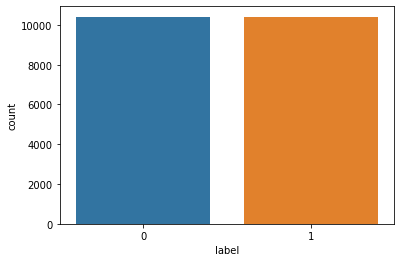

In [ ]:
sns.countplot(x ='label', data = dataset)


# Checking for Null values

In [ ]:
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
dataset = dataset.fillna(' ')

# Data Preprocessing

## Remove Empty Text News

In [ ]:
dataset['text'] = dataset['text'].str.strip()                                   #Remove spaces at the beginning and at the end of the string
dataset['text'] = dataset['text'].replace(r'^\s*$', np.nan, regex=True)         #RegEx Match method checks for a match only at the beginning of the string. But if a match is found in some other line, the Python RegEx Match function returns null
dataset.dropna(subset=['text'], inplace=True)                                   #Remove all rows where complaints column is nan


## Working on Duplicate Data

In [ ]:
dataset.duplicated(subset=["text"]).value_counts()                               #Checking for duplicate entries

False    20378
True       306
dtype: int64

In [ ]:
dataset = dataset.drop_duplicates(subset={"text"}, keep='first', inplace=False)     #Dropping duplicate data
dataset.shape

(20378, 5)

# Vectorization

In [ ]:
x = dataset['text'].values
y = dataset['label'].values

# Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',  max_features=50, ngram_range=(1,3))
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfidf_train, y_train)
y_pred = classifier.predict(tfidf_test)

# Output Analysis

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

Accuracy: 80.37%
[[1819  257]
 [ 543 1457]]


# Predicting a News

In [ ]:
def individual_result(data1):
  tfidf_test=tfidf_vectorizer.transform(data1)
  y_pred = classifier.predict(tfidf_test)
  value = y_pred[0]
  if value==1:
    print("This news is Fake")
  else:
    print("This news is Real")




# Predicting many news at a time

In [ ]:
def many_result(data1):
  tfidf_test=tfidf_vectorizer.transform(data1)
  y_pred = classifier.predict(tfidf_test)
  for i in y_pred:
    value = i
    if value==1:
      print("This news is Fake")
    else:
      print("This news is Real")


In [ ]:
x_test.shape

(4076,)

# Testing on a real news

In [ ]:
news = ["""The Centre on Tuesday said that the
 Omicron variant of COVID-19 is at least thrice more transmissible than Delta and asked
  states and union territories to "activate" war rooms, keep analyzing even small trends 
and surges and keep taking strict and prompt containment action at district and local levels In
 a letter to the states and union territories, Union Health Secretary Rajesh Bhushan advised 
 implementing strategic interventions for containment like imposition of night curfew, strict 
 regulation of large gatherings, 
curtailing numbers in marriages and funerals besides increasing testing and surveillance."""]

In [ ]:
result(news)

This news is Real
